# Desafio 3 | Grupo 100 Viés | Turma 7 - Data Science
# RH - Predição de Attrition

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Análise Exploratória 

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [3]:
rh = pd.read_csv("rh_perfumaria_e_cosmeticos.csv",sep=';',
                encoding='cp1252',
                decimal=',')
pd.set_option('display.max_columns', None)
rh.sample(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
1373   38        No  Travel_Frequently       1394  Research & Development   
740    35        No      Travel_Rarely        802  Research & Development   
342    31        No      Travel_Rarely       1232  Research & Development   
417    40        No      Travel_Rarely       1398                   Sales   
552    56        No      Travel_Rarely        832  Research & Development   
197    42        No         Non-Travel        926  Research & Development   
142    38        No      Travel_Rarely        364  Research & Development   
1067   47        No      Travel_Rarely        571                   Sales   
755    45        No      Travel_Rarely       1234                   Sales   
196    35        No  Travel_Frequently        138  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1373                 8          3           Medical              1   
740                 10          3             Other              1   
342                  7          4           Medical              1   
417                  2          4     Life Sciences              1   
552                  9          3           Medical              1   
197                 21          2           Medical              1   
142                  3          5  Technical Degree              1   
1067                14          3           Medical              1   
755                 11          2     Life Sciences              1   
196                  2          3           Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
1373            1937                        4  Female          58   
740             1028                        2    Male          45   
342              462                        3  Female          39   
417              558                        3  Female          79   
552              762                        3    Male          81   
197              270                        3  Female          36   
142              193                        4  Female          32   
1067            1503                        3  Female          78   
755             1045                        4  Female          90   
196              269                        2  Female          37   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1373               2         2         Research Scientist                2   
740                3         1      Laboratory Technician                4   
342                3         3     Manufacturing Director                4   
417                3         5                    Manager                3   
552                3         4  Healthcare Representative                4   
197                3         2     Manufacturing Director                3   
142                3         2         Research Scientist                3   
1067               3         2            Sales Executive                3   
755                3         4                    Manager                4   
196                3         2      Laboratory Technician                2   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1373      Divorced           2133        18115                   1      Y   
740       Divorced           3917         9541                   1      Y   
342         Single           7143        25713                   1      Y   
417        Married          18041        13022                   0      Y   
552        Married          11103        20420                   7      Y   
197       Divorced           5265        16439                   2      Y   
142         Single           4317         2302                   3      Y   
1067       Married           4591        24200                   3      Y   
755        Married          17650         5404                   3      Y  

Text(0, 0.5, 'Frequence')

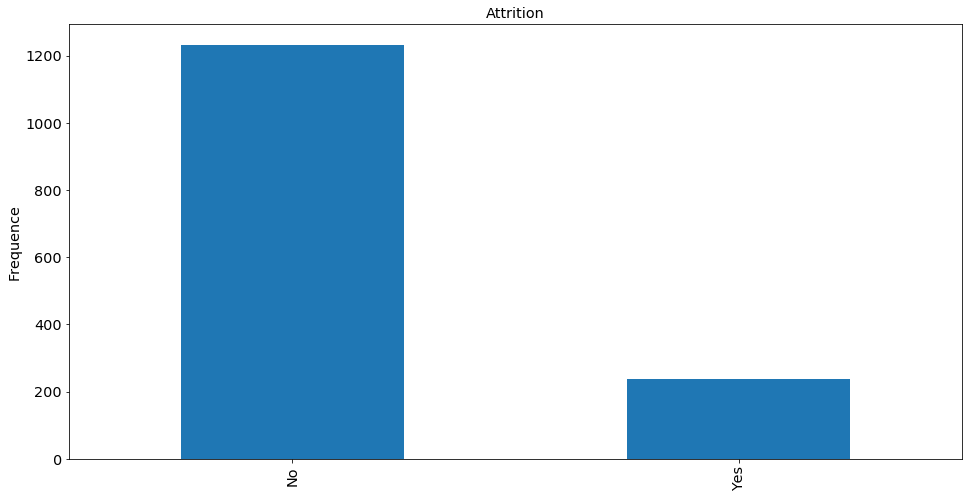

In [4]:
count_attrition = pd.value_counts(rh['Attrition'])
count_attrition.plot(kind='bar')
count_attrition
plt.title("Attrition")
plt.ylabel("Frequence")

Attrition Yes = 237 (19%)

Attrition No = 1233 (81%)


## PERGUNTA DE NEGÓCIO: O QUE FAZER PARA RETER OS TALENTOS?

In [5]:
rh.shape

(1470, 35)

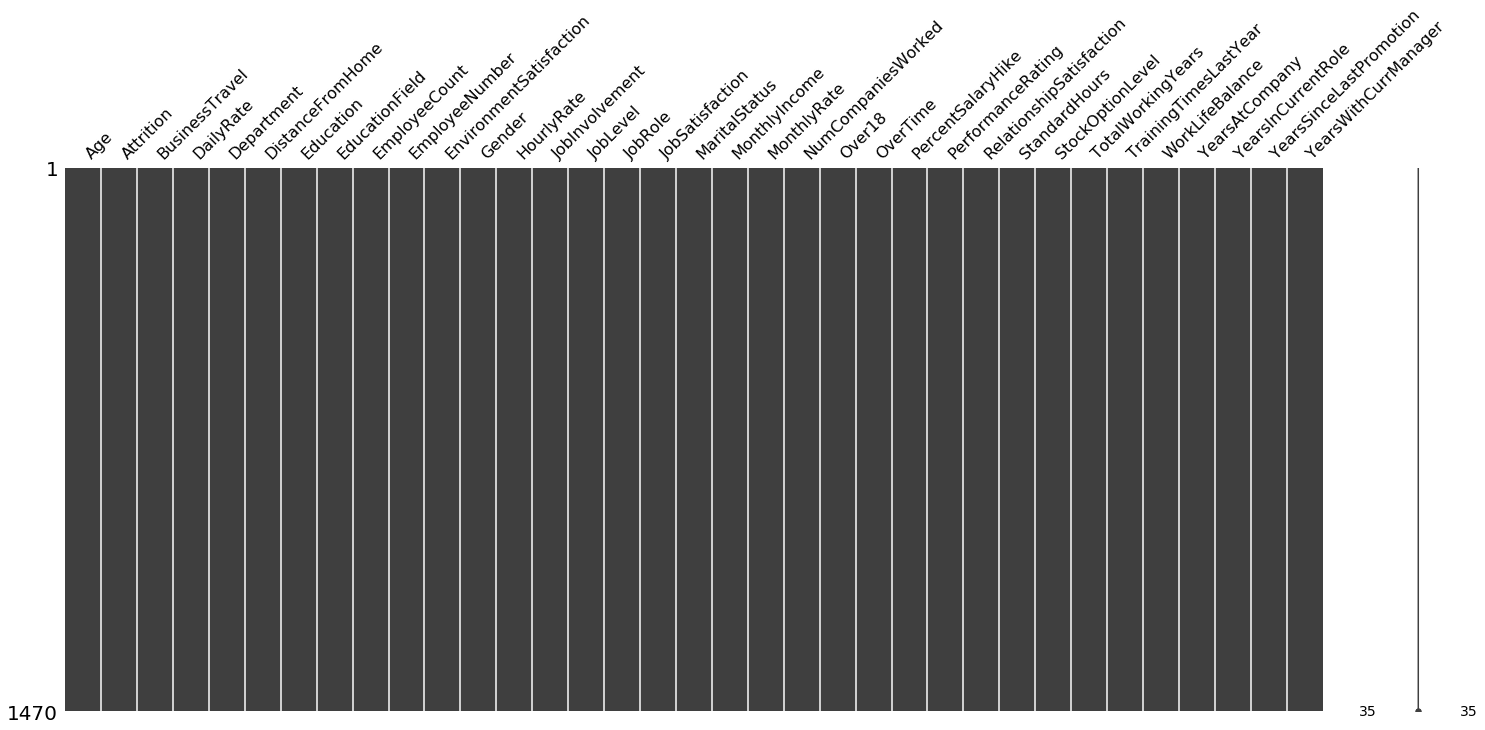

In [6]:
# verificando os dados NaNs
import missingno as msno
msno.matrix(rh)

In [7]:
rh.shape

(1470, 35)

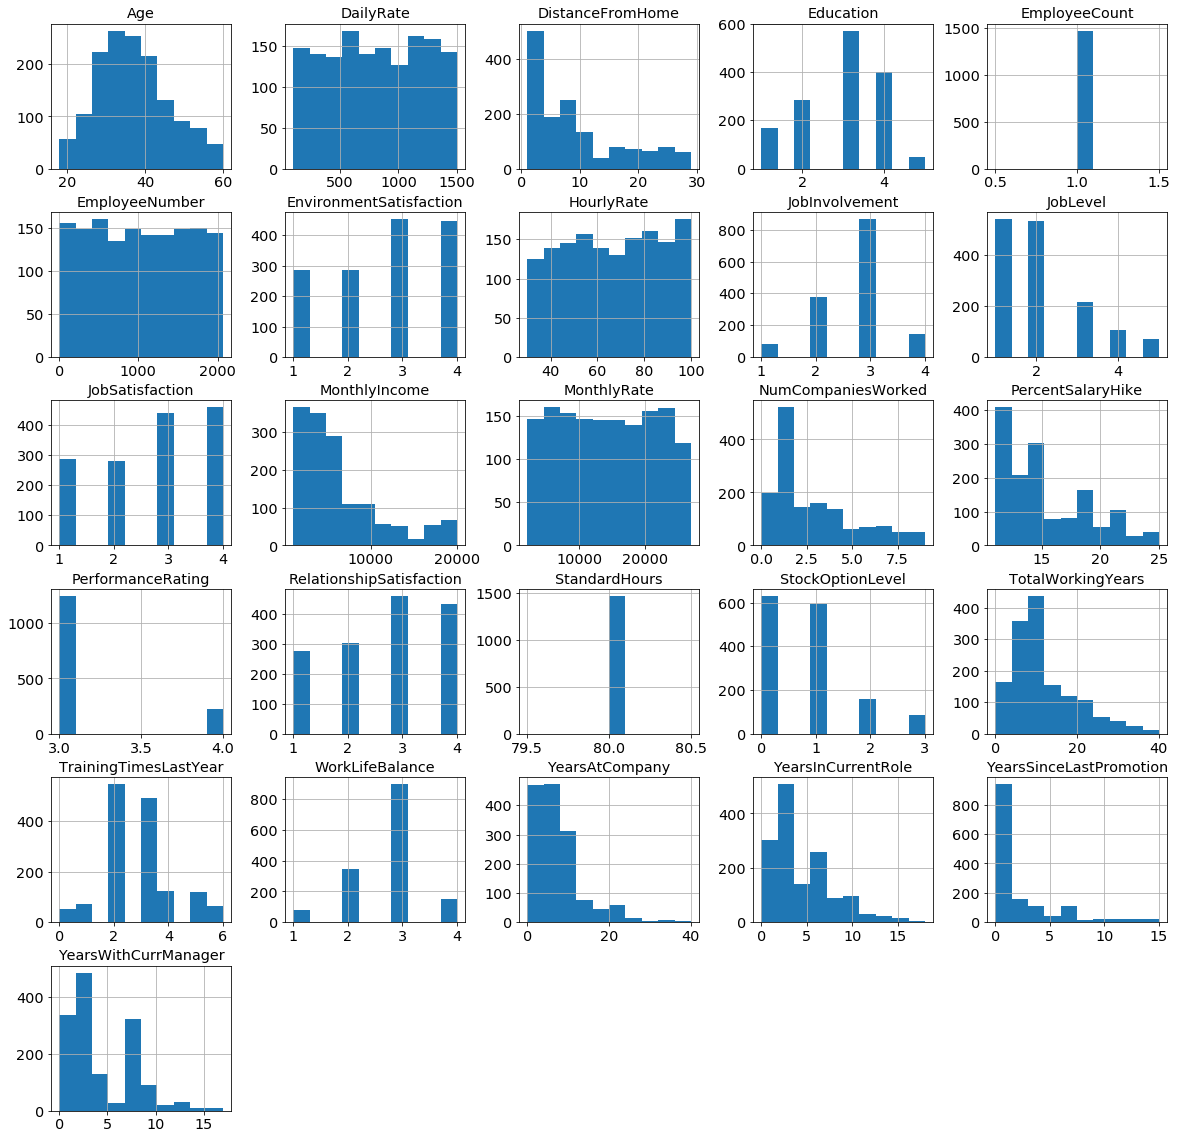

In [8]:
p = rh.hist(figsize = (20,20))

## Colunas a serem dropadas: valores únicos

In [9]:
## Dropando variáveis com valor único fixo
print(pd.value_counts(rh['EmployeeCount']))
print(pd.value_counts(rh['StandardHours']))
print(pd.value_counts(rh['Over18']))

1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64
Y    1470
Name: Over18, dtype: int64


In [10]:
rh=rh.drop('EmployeeNumber',axis=1)

In [11]:
rh=rh.drop('EmployeeCount', axis=1)
rh=rh.drop('StandardHours', axis=1)
rh=rh.drop('Over18',axis=1)

rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Dummies nas Variáveis Categóricas Preditoras

In [12]:
rh=pd.concat([rh, pd.get_dummies(rh.EducationField, prefix="EField", drop_first=True)],axis=1)
rh=rh.drop('EducationField',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.Gender, prefix="Gender", drop_first=True)],axis=1)
rh=rh.drop('Gender',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.BusinessTravel, prefix="BTravel", drop_first=True)],axis=1)
rh=rh.drop('BusinessTravel',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.Department, prefix="Department", drop_first=True)],axis=1)
rh=rh.drop('Department',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.JobRole, prefix="JobRole", drop_first=True)],axis=1)
rh=rh.drop('JobRole',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.MaritalStatus, prefix="MStatus", drop_first=True)],axis=1)
rh=rh.drop('MaritalStatus',axis=1)

rh=pd.concat([rh, pd.get_dummies(rh.OverTime, prefix="OverTime", drop_first=True)],axis=1)
rh=rh.drop('OverTime',axis=1)

rh.sample(10)

Age Attrition  DailyRate  DistanceFromHome  Education  \
102    20       Yes        871                 6          3   
423    30        No       1398                22          4   
1324   29        No        726                29          1   
1150   35        No        819                18          5   
916    46        No        168                 4          2   
1441   56        No        667                 1          4   
702    30        No        231                 8          2   
221    33        No        147                 4          4   
1178   20        No       1141                 2          3   
996    27        No        205                10          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
102                         4          66               2         1   
423                         3          69               3         3   
1324                        4          93               1         2   
1150                        2          48               4         2   
916                         4          33               2         5   
1441                        3          57               3         2   
702                         3          62               3         3   
221                         3          47               2         1   
1178                        3          31               3         1   
996                         4          98               2         2   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
102                 4           2926        19783                   1   
423                 1           8412         2890                   0   
1324                3           6384        21143                   8   
1150                1           5208        26312                   1   
916                 2          18789         9946                   2   
1441                3           6306        26236                   1   
702                 3           7264         9977                   5   
221                 2           2622        13248                   6   
1178                3           2783        13251                   1   
996                 4           5769         7100                   1   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
102                  18                  3                         2   
423                  11                  3                         3   
1324                 17                  3                         4   
1150                 11                  3                         4   
916                  14                  3                         3   
1441                 21                  4                         1   
702                  11                  3                         1   
221                  21                  4                         4   
1178                 19                  3                         1   
996                  11                  3                         4   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
102                  0                  1                      5   
423                  0                 10                      3   
1324                 2                 11                      3   
1150                 0                 16                      2   
916                  1                 26                      2   
1441                 1                 13                      2   
702                  1                 10                      2   
221                  0                  7                      3   
1178                 0                  2                      3   
996                  0                  6                      3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
102                 3               1                   0   
423                 3               9                   8   
1

Text(0, 0.5, 'Frequence')

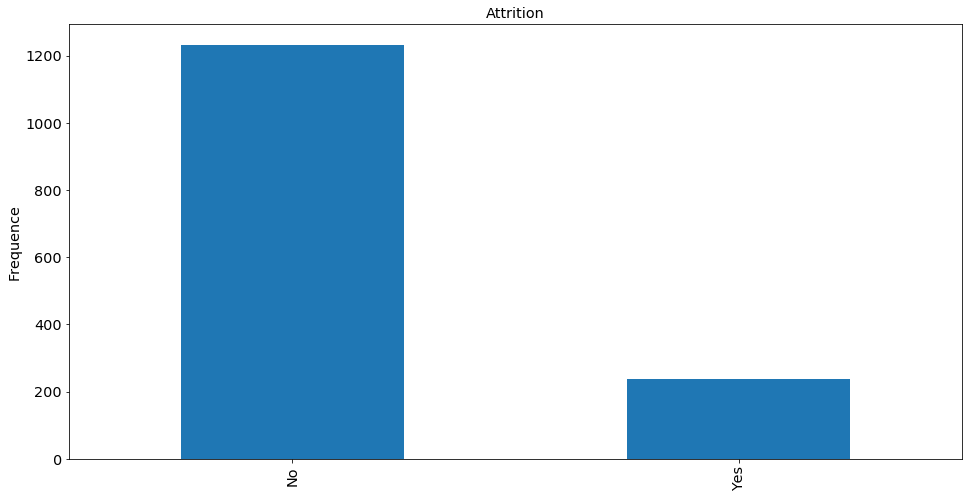

In [13]:
count_attrition = pd.value_counts(rh['Attrition'])
count_attrition.plot(kind='bar')
count_attrition
plt.title("Attrition")
plt.ylabel("Frequence")

## Dummies na Variável Target (Attrition)

In [14]:
y=rh['Attrition'].map({"No":0,"Yes":1})

In [15]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [16]:
#p=sns.pairplot(rh, hue = 'Attrition')

In [17]:
# Plotting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})

# Pre processing and manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib

# metrics and hyperparameter optimization
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error
from skopt import dummy_minimize
from skopt import gp_minimize

# models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from lightgbm import LGBMClassifier, LGBMRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor

In [18]:
X=rh.drop('Attrition', axis=1)
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EField_Life Sciences', 'EField_Marketing', 'EField_Medical',
       'EField_Other', 'EField_Technical Degree', 'Gender_Male',
       'BTravel_Travel_Frequently', 'BTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Represe

## Dividindo o Dataset em Treino e Teste

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1029, 44), (441, 44), (1029,), (441,))

# Pipeline

In [21]:
# Construct some pipelines
pipe_svm = Pipeline([('scl', StandardScaler()),
                     #('pca', PCA(n_components=2)),
                     ('clf', svm.SVC(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
                    #('pca', PCA(n_components=2)),
                    ('clf', tree.DecisionTreeClassifier(random_state=42))])
# List of pipelines for ease of iteration
pipelines = [pipe_svm, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Support Vector Machine', 1: 'Decision Tree'}

## Resultado1 | Pipeline: SVM, DT, RandomForestClassifier - Dados desbalanceados

### Support Vector Machine (SVM)

In [22]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Support Vector Machine pipeline test accuracy: 0.880
Decision Tree pipeline test accuracy: 0.812


*Acurácia não é a métrica recomendado para variáveis com classes desbalanceadas

*A métrica recomendada é o Recall, ou seja, de todos os Attrition = 1 observados, qual  % o modelo acertou

In [23]:
#Support Vector Machine (SVM) Sem Balanceamento
#Recall_SVM = 0.15
from sklearn.metrics import classification_report
p_svm = pipe_svm.predict(X_test)
print(classification_report(y_test,p_svm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       380
           1       0.90      0.15      0.25        61

    accuracy                           0.88       441
   macro avg       0.89      0.57      0.59       441
weighted avg       0.88      0.88      0.84       441



### Decision Tree (DT)

In [24]:
#Decision Tree (DT) Sem Balanceamento
#Recall_DT = 0.46
         #melhorou em comparação ao LR e SVM, mas ainda longe de 1)
from sklearn.metrics import classification_report
p_dt = pipe_dt.predict(X_test)
print(classification_report(y_test,p_dt))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       380
           1       0.36      0.46      0.40        61

    accuracy                           0.81       441
   macro avg       0.63      0.66      0.65       441
weighted avg       0.83      0.81      0.82       441



### Random Forest Classifier (RFC)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier (n_estimators=1000, n_jobs=-1,random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
#Recall_RFC = 0.08 Sem Balanceamento
            #sem tunar os parametros, por enquanto o melhor Recall foi do modelo Decision Tree (0.25)
from sklearn.metrics import classification_report
p_rfc = rfc.predict(X_test)
print(classification_report(y_test,p_rfc))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441



In [27]:
#Como o predict para o X_train foi =1, é sinal que overfitou !!! Por isso o Predict para o X_test ficou baixo
p_rfc_train = rfc.predict(X_train)
print(classification_report(y_train,p_rfc_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



### Balanceando a variável target (Attrition)

In [28]:
pip install smote

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resamp, y_resamp = SMOTE().fit_resample(X, y)

X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_resamp, y_resamp, test_size=0.30, random_state=42)

In [31]:
for pipe in pipelines:
    pipe.fit(X_trainr, y_trainr)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_testr, y_testr)))

Support Vector Machine pipeline test accuracy: 0.914
Decision Tree pipeline test accuracy: 0.841


### SVM com a variável Attrition balanceada

In [32]:
#Support Vector Machine (SVM) com Attrition Balanceado
#Recall_SVM = de 0.07 para 0.86 p/ Attrition[1]
from sklearn.metrics import classification_report
p_svmr = pipe_svm.predict(X_testr)
print(classification_report(y_testr,p_svmr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       369
           1       0.97      0.85      0.91       371

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740



### RFC com a variável Attrition balanceada

In [33]:
#RFC com Attrition Balanceado
#Recall_RFC = de 0.08 para 0.32 p/ Attrition[1] O melhor modelo foi o Decision Tree (Recall=0.77)            
from sklearn.metrics import classification_report
p_rfcr = rfc.predict(X_testr)
print(classification_report(y_testr,p_rfcr))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74       369
           1       0.98      0.32      0.49       371

    accuracy                           0.66       740
   macro avg       0.79      0.66      0.62       740
weighted avg       0.79      0.66      0.61       740



In [34]:
p_rfcr_train = rfc.predict(X_trainr)
print(classification_report(y_trainr,p_rfcr_train))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       864
           1       1.00      0.34      0.50       862

    accuracy                           0.67      1726
   macro avg       0.80      0.67      0.63      1726
weighted avg       0.80      0.67      0.63      1726



### DT com a variável Attrition balanceada

In [35]:
#Decision Tree (DT) com Attrition Balanceado
#Recall_DT = de 0.28 para 0.82 p/ Attrition[1] EXCELENTE !

from sklearn.metrics import classification_report
p_dtr = pipe_dt.predict(X_testr)
print(classification_report(y_testr,p_dtr))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       369
           1       0.84      0.84      0.84       371

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



# SHAP - Ranking de importancia de cada variável no output do modelo

In [36]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [37]:
import shap
shap.initjs()

In [38]:
rank = shap.TreeExplainer(rfc)
shap_values = rank.shap_values(X_trainr)

In [39]:
shap_values[0].shape

(1726, 44)

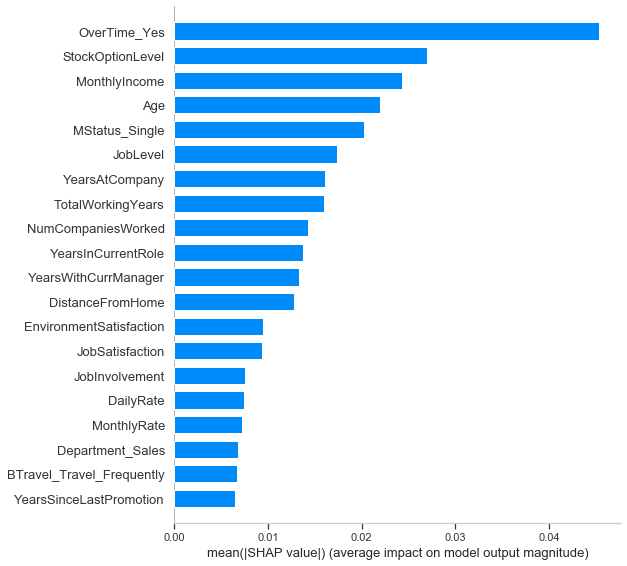

In [40]:
shap_values = shap.TreeExplainer(rfc).shap_values(X_train)
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

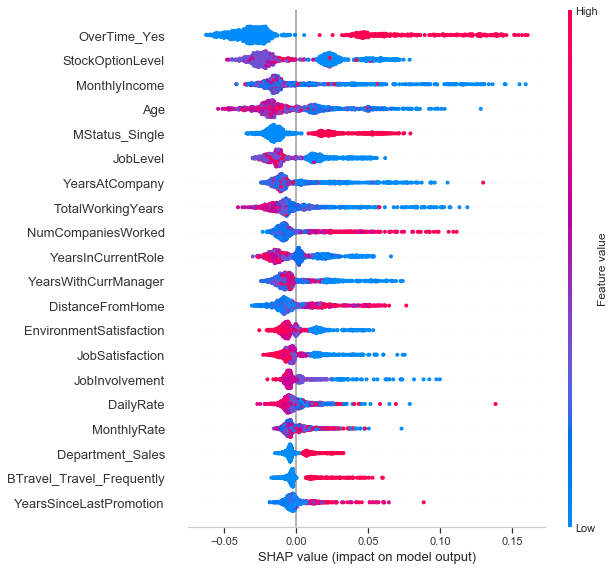

In [55]:
shap.summary_plot(shap_values[1], X_train)

In [58]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X)

In [90]:
shap.force_plot(explainer.expected_value[1],shap_values[1][0,:], X_train.iloc[0,:])


In [71]:
shap.force_plot(explainer.expected_value[1],shap_values[1][100,:], X_train.iloc[100,:])

In [72]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X)

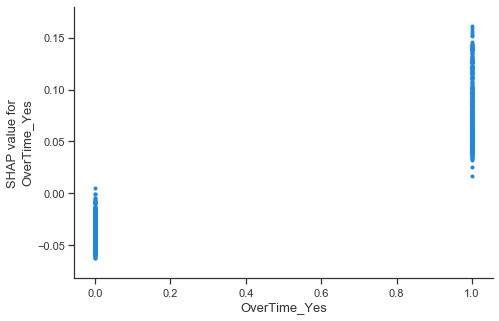

In [74]:
shap.dependence_plot("OverTime_Yes",shap_values[1],X,interaction_index=None)

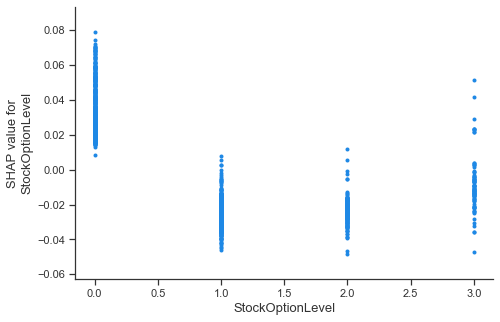

In [77]:
shap.dependence_plot("StockOptionLevel",shap_values[1],X,interaction_index=None)

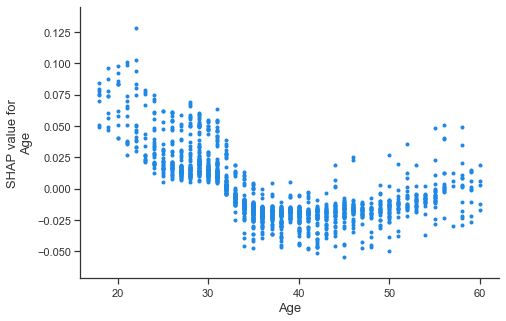

In [78]:
shap.dependence_plot("Age",shap_values[1],X,interaction_index=None)

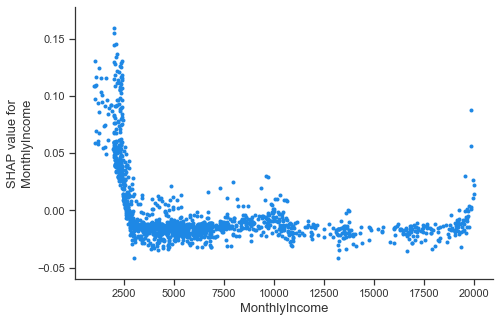

In [83]:
shap.dependence_plot("MonthlyIncome",shap_values[1],X,interaction_index=None)

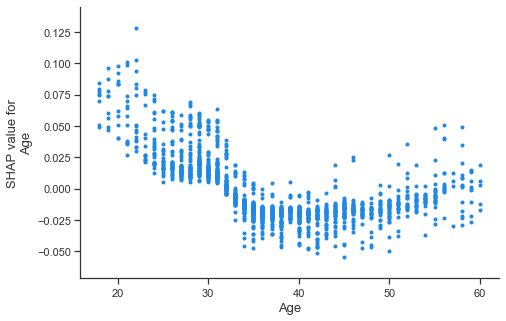

In [84]:
shap.dependence_plot("Age",shap_values[1],X,interaction_index=None)

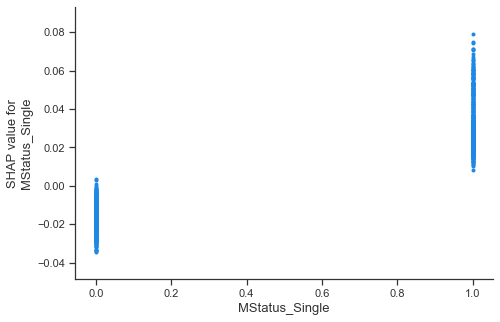

In [85]:
shap.dependence_plot("MStatus_Single",shap_values[1],X,interaction_index=None)